In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
jobs_data = pd.read_csv("/content/job-market(1).csv")

In [22]:
jobs_data.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

# Job by location

In [ ]:
jobs_by_location = jobs_data['Location'].value_counts()

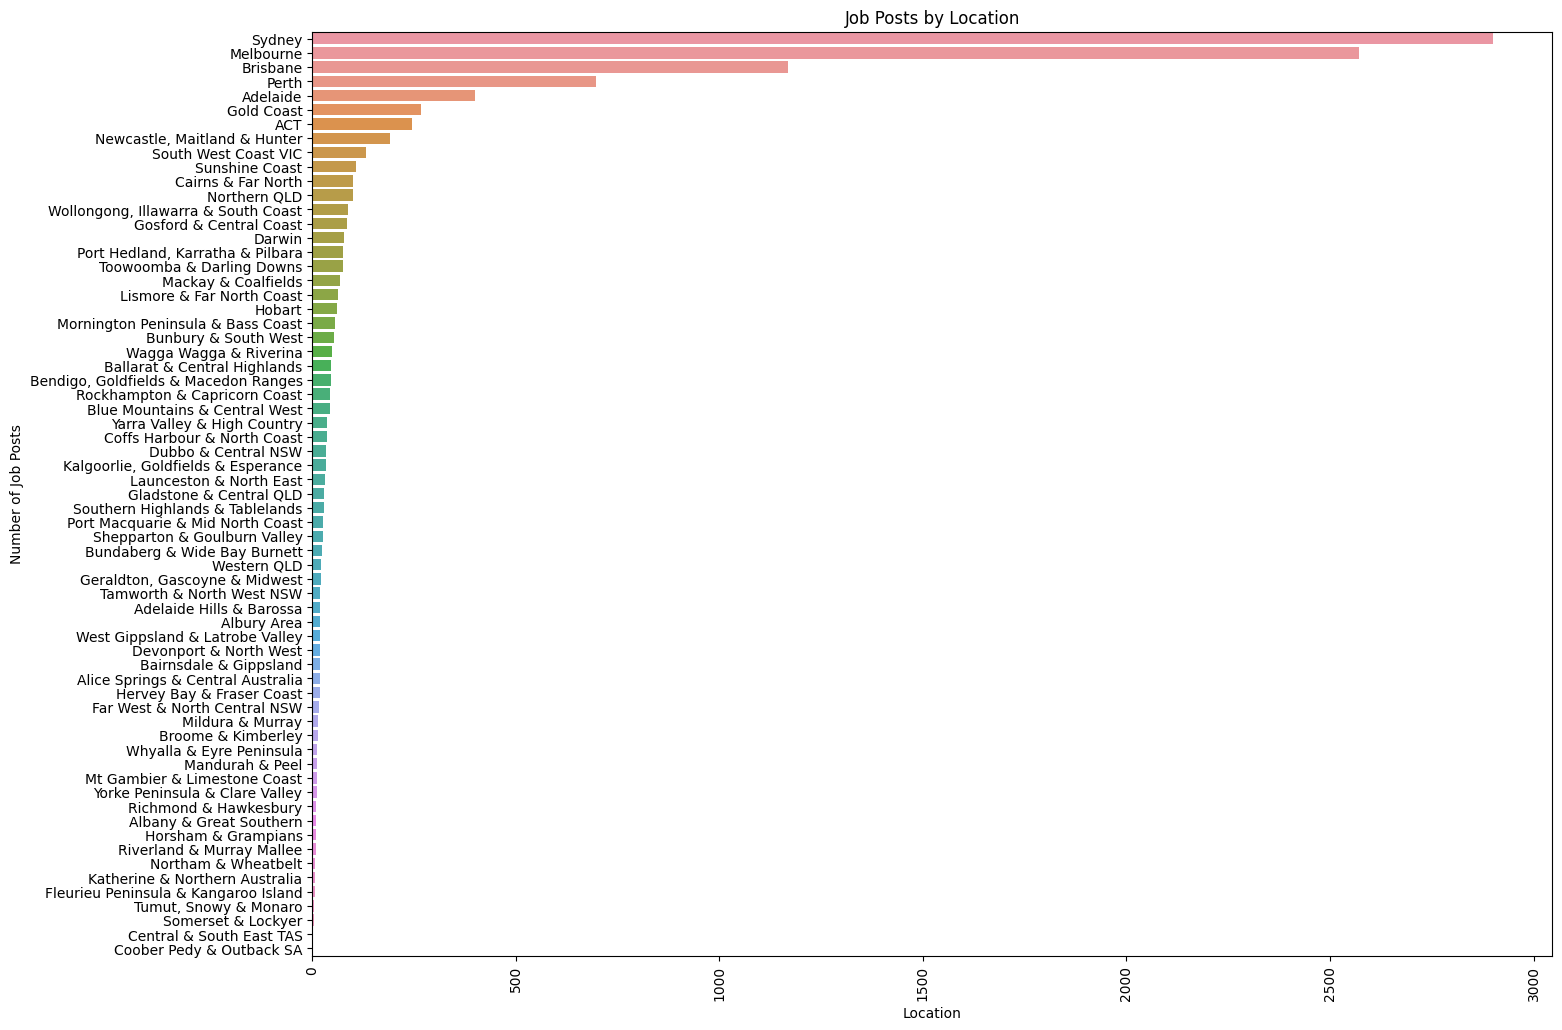

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x=jobs_by_location.values, y=jobs_by_location.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Number of Job Posts')
plt.title('Job Posts by Location')
plt.show()


# Job posts by salary range

## With LowestSalary

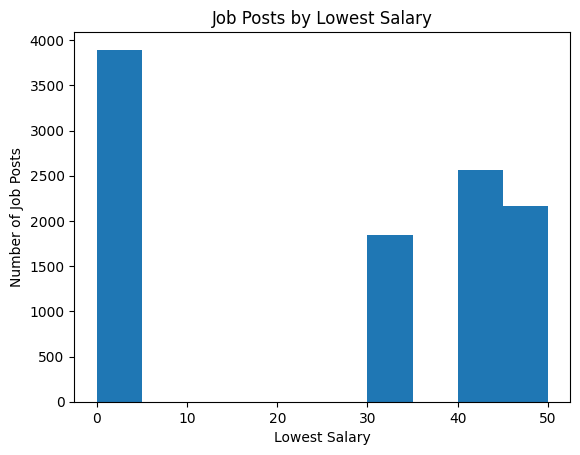

In [26]:
plt.hist(jobs_data["LowestSalary"], bins=10)
plt.xlabel("Lowest Salary")
plt.ylabel("Number of Job Posts")
plt.title("Job Posts by Lowest Salary")
plt.show()


## With HighestSalary

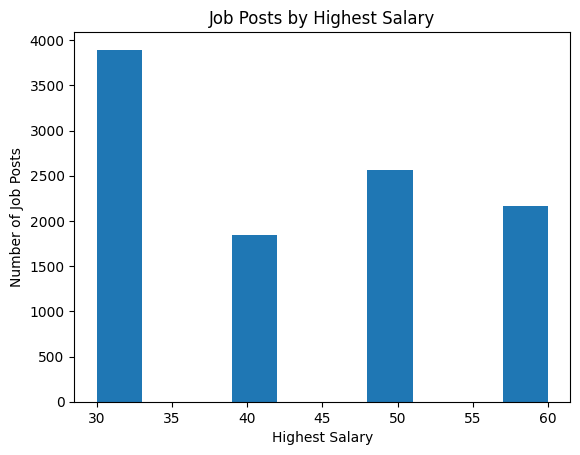

In [27]:
plt.hist(jobs_data["HighestSalary"], bins=10)
plt.xlabel("Highest Salary")
plt.ylabel("Number of Job Posts")
plt.title("Job Posts by Highest Salary")
plt.show()

In [34]:
jobs_data.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [38]:
df['SalaryRange'] = df.apply(lambda x: '${} - ${}'.format(x['LowestSalary'], x['HighestSalary']), axis=1)



In [39]:
salary_counts = df.groupby('SalaryRange')['Id'].count().reset_index(name='Count')


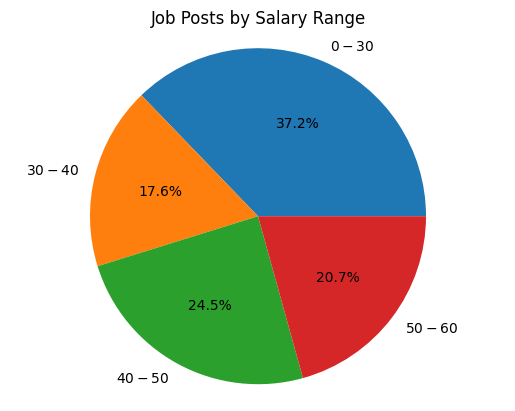

In [40]:
import matplotlib.pyplot as plt

plt.pie(salary_counts['Count'], labels=salary_counts['SalaryRange'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Job Posts by Salary Range')
plt.show()


# Explore other aspects of the dataset

## Job postings by location and area

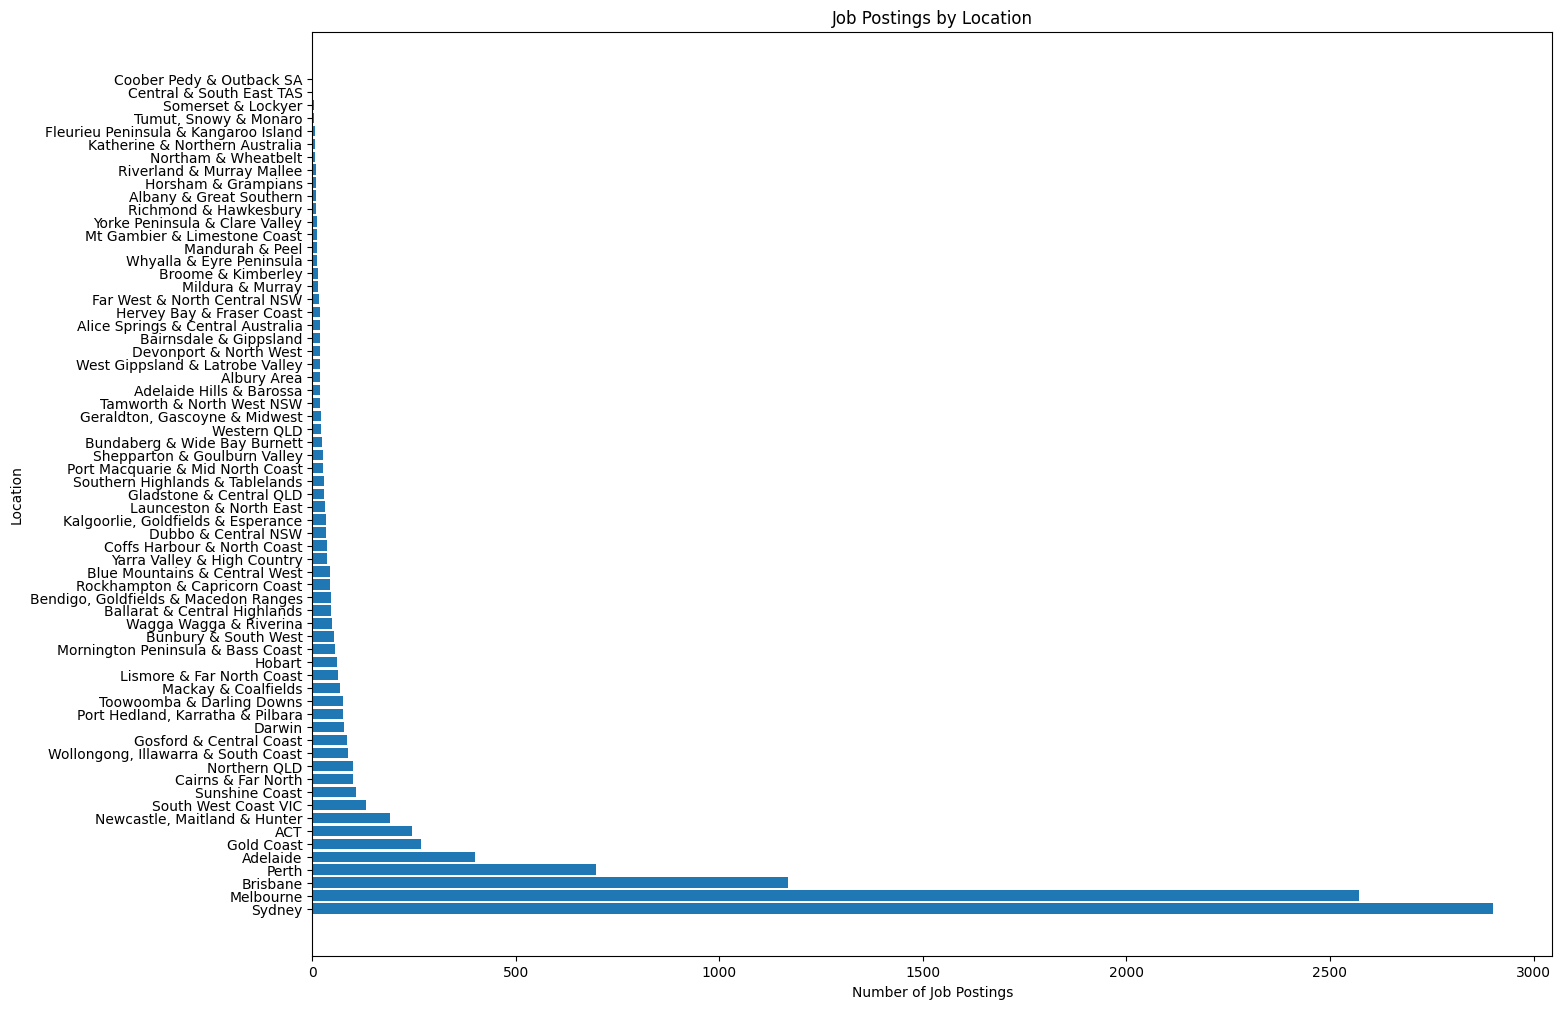

In [42]:
# Create a horizontal bar chart of job postings by location
plt.figure(figsize=(16,12))
location_counts = df['Location'].value_counts()
plt.barh(location_counts.index, location_counts.values)
plt.title('Job Postings by Location')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()

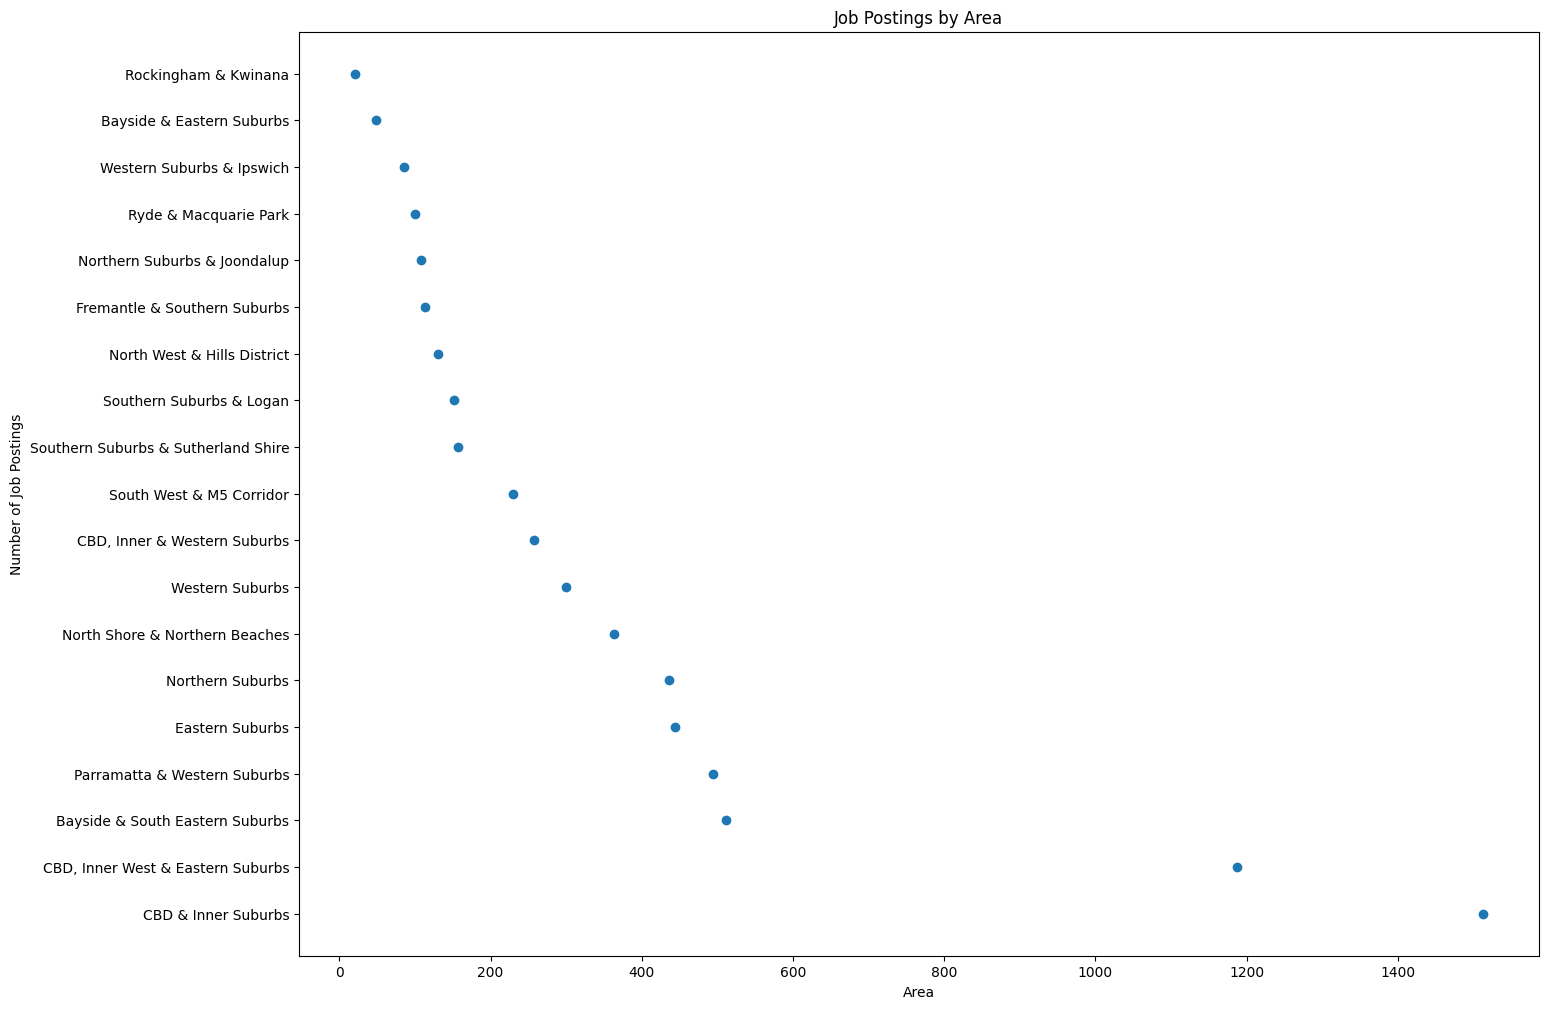

In [44]:
# Create a scatter plot of job postings by area
plt.figure(figsize=(16,12))
area_counts = df['Area'].value_counts()
plt.scatter(area_counts.values, area_counts.index)
plt.title('Job Postings by Area')
plt.xlabel('Area')
plt.ylabel('Number of Job Postings')
plt.show()


## Job postings by classification and sub-classification

In [45]:
class_subclass_counts = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Counts')


In [48]:
plt.figure(figsize=(16,12))
sns.catplot(x="Classification", y="Counts", hue="SubClassification", data=class_subclass_counts, kind="bar", height=12, aspect=12)

<Figure size 1600x1200 with 0 Axes>

## Job postings by job type

In [49]:
# Create a dataframe with job type counts
jobtype_counts = df['JobType'].value_counts().reset_index()
jobtype_counts.columns = ['JobType', 'Counts']

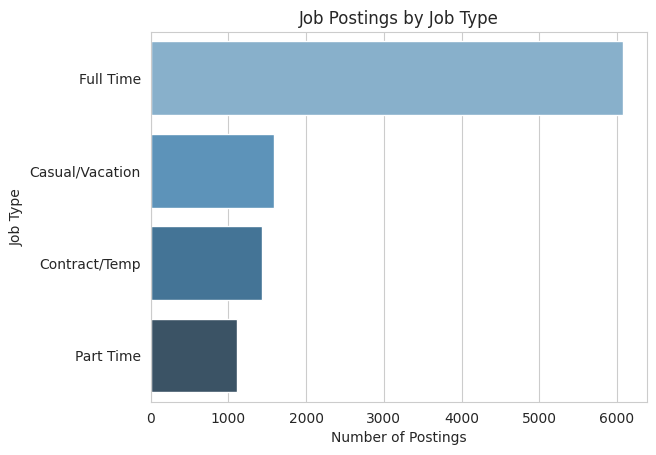

In [50]:
# Create a horizontal bar chart
sns.set_style("whitegrid")
sns.barplot(x="Counts", y="JobType", data=jobtype_counts, palette="Blues_d")
plt.title("Job Postings by Job Type")
plt.xlabel("Number of Postings")
plt.ylabel("Job Type")
plt.show()